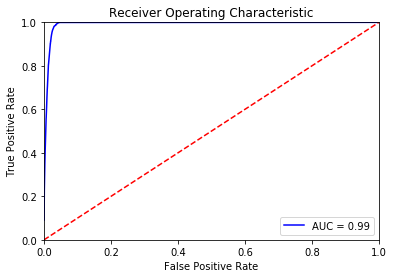

In [19]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import auc

gc_fpr = []
gc_tpr = []

with open('../data/gc-confusion.tsv', 'r') as gc_confusion_matrix:
    for line in gc_confusion_matrix:
        rank, true_pos, false_pos, false_neg, true_neg = line.rstrip("\n").split("\t")

        gc_fpr.append( int(false_pos) / (int(false_pos) + int(true_neg)) )
        gc_tpr.append( int(true_pos) / (int(true_pos) + int(false_neg)) )

roc_auc = auc(gc_fpr, gc_tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(gc_fpr, gc_tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
